<a href="https://colab.research.google.com/github/Dilor2021/lab-dom-pizza-builder/blob/master/Python_project_sprint_(Patrick).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
print('Car Dataset Analysis Project')

Car Dataset Analysis Project


# **Car Dataset Analysis Project**
### Dieses Projekt befasst sich mit der Exploration, Transformation und Analyse eines umfassenden Datensatzes über Automobile. Es ist Teil eines Projektsprints, der es ermöglicht, die im Kurs erlernten Techniken der Datenbereinigung, Datenaufbereitung und explorativen Analyse in die Praxis umzusetzen.

##*** Ziele: ***
Durchführung von Vorverarbeitungsoperationen an einem umfangreichen Datensatz über Kraftfahrzeuge.
Extrahieren relevanter Trends und Erkenntnisse aus verschiedenen Fahrzeugmerkmalen.
Entwicklung einer umfassenden explorativen Analyse zur Bewertung von Leistung, Verbrauch und anderen Fahrzeugspezifika.

##*** Methodik und Werkzeuge: ***
Der Ansatz in diesem Projekt umfasst
Die Bereinigung des Datensatzes (Verwaltung fehlender Werte, Vereinheitlichung der Formate).
Die Umwandlung von Variablen für eine genauere Analyse (Standardisierung und Kodierung kategorischer Daten).
Die explorative Analyse, um Korrelationen zwischen den verschiedenen Fahrzeugmerkmalen zu ermitteln und Erkenntnisse über Trends in der Automobilindustrie zu gewinnen.

#*** Schritt 0: Daten hochladen ***
Import der benötigten Bibliotheken und Laden der CSV-Datei.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# CSV-Datei hochladen
from google.colab import files

# CSV-Datei lesen
data = pd.read_csv('https://drive.google.com/uc?id=19V7VjHs4J8idTko7NQUT95ZJO2ZQSGWh&export=download')

# Datenvorschau anzeigen
data.head ()


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [5]:
# Informationen anzeigen
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8166 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               8166 non-null   object 
 1   Model              8166 non-null   object 
 2   Year               8166 non-null   int64  
 3   Engine Fuel Type   8166 non-null   object 
 4   Engine HP          8166 non-null   float64
 5   Engine Cylinders   8166 non-null   float64
 6   Transmission Type  8166 non-null   object 
 7   Driven_Wheels      8166 non-null   object 
 8   Number of Doors    8166 non-null   float64
 9   Market Category    8166 non-null   object 
 10  Vehicle Size       8166 non-null   object 
 11  Vehicle Style      8166 non-null   object 
 12  highway MPG        8166 non-null   int64  
 13  city mpg           8166 non-null   int64  
 14  Popularity         8166 non-null   int64  
 15  MSRP               8166 non-null   int64  
dtypes: float64(3), int64(5), obj

#*** Schritt 1:Bereinigung der Daten***.
#### 1- Umgang mit fehlenden Werten ####
##### * Identifikation von Spalten mit fehlenden Werten.
##### * Füllen oder Entfernen der fehlenden Werte entsprechend der gewählten Strategie.

In [103]:
# Zeigen Sie eine Vorschau der Daten an
data.describe ()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP,Total MPG,Price per HP
count,7831.000000,7831.000000,7831.00000,7831.000000,7831.000000,7831.000000,7831.000000,7.831000e+03,7831.000000,7831.000000
mean,2012.922743,279.047179,5.77699,3.436598,27.128208,20.108288,1508.593539,5.202989e+04,23.618248,166.001241
std,4.881328,113.721243,1.92219,0.886991,9.450951,9.999873,1426.215568,7.074603e+04,9.421549,107.465308
min,1995.000000,55.000000,0.00000,2.000000,12.000000,7.000000,2.000000,2.000000e+03,9.500000,7.142857
25%,2011.000000,200.000000,4.00000,2.000000,23.000000,16.000000,549.000000,2.702500e+04,19.500000,123.685714
50%,2015.000000,268.000000,6.00000,4.000000,26.000000,18.000000,1013.000000,3.583000e+04,22.000000,145.574713
75%,2016.000000,325.000000,6.00000,4.000000,30.000000,22.000000,2009.000000,4.975000e+04,26.500000,177.772924
max,2017.000000,1001.000000,16.00000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06,189.000000,2307.692308


In [104]:
# Duplikate von Daten anzeigen
data.duplicated ()

,0
0,False
1,False
2,False
3,False
4,False
...,...
11909,False
11910,False
11911,False
11912,False


In [105]:
# Auf fehlende Werte prüfen
print(data.isnull().sum())

# Füllen Sie die fehlenden Werte für die numerischen Spalten mit dem Mittelwert auf.
#data['Engine HP'].fillna(data['Engine HP'].mean(), inplace=True)
data.fillna(data['Engine HP'].mean(), inplace=True)

#data['Engine Cylinders'].fillna(data['Engine Cylinders'].mean(), inplace=True)
data.fillna(data['Engine Cylinders'].mean(), inplace=True)

# Entfernen der verbleibenden Zeilen mit fehlenden Werten
data.dropna(inplace=True)


Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
Total MPG            0
Price per HP         0
dtype: int64


#### 2- Konvertierung der Datentypen ####
##### Sicherstellen, dass die Spalte das Ganzzahlformat hat.



In [106]:
data['Year'] = data['Year'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7831 entries, 0 to 11913
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               7831 non-null   object 
 1   Model              7831 non-null   object 
 2   Year               7831 non-null   int64  
 3   Engine Fuel Type   7831 non-null   object 
 4   Engine HP          7831 non-null   float64
 5   Engine Cylinders   7831 non-null   float64
 6   Transmission Type  7831 non-null   object 
 7   Driven_Wheels      7831 non-null   object 
 8   Number of Doors    7831 non-null   float64
 9   Market Category    7831 non-null   object 
 10  Vehicle Size       7831 non-null   object 
 11  Vehicle Style      7831 non-null   object 
 12  highway MPG        7831 non-null   int64  
 13  city mpg           7831 non-null   int64  
 14  Popularity         7831 non-null   int64  
 15  MSRP               7831 non-null   int64  
 16  Total MPG          7831 non-

#### 3- Datenfilterung
##### Nur Autos behalten, die nach 1995 produziert wurden.

In [107]:
data = data[data['Year'] >= 1995]
data.describe ()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP,Total MPG,Price per HP
count,7831.000000,7831.000000,7831.00000,7831.000000,7831.000000,7831.000000,7831.000000,7.831000e+03,7831.000000,7831.000000
mean,2012.922743,279.047179,5.77699,3.436598,27.128208,20.108288,1508.593539,5.202989e+04,23.618248,166.001241
std,4.881328,113.721243,1.92219,0.886991,9.450951,9.999873,1426.215568,7.074603e+04,9.421549,107.465308
min,1995.000000,55.000000,0.00000,2.000000,12.000000,7.000000,2.000000,2.000000e+03,9.500000,7.142857
25%,2011.000000,200.000000,4.00000,2.000000,23.000000,16.000000,549.000000,2.702500e+04,19.500000,123.685714
50%,2015.000000,268.000000,6.00000,4.000000,26.000000,18.000000,1013.000000,3.583000e+04,22.000000,145.574713
75%,2016.000000,325.000000,6.00000,4.000000,30.000000,22.000000,2009.000000,4.975000e+04,26.500000,177.772924
max,2017.000000,1001.000000,16.00000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06,189.000000,2307.692308


#### 4-String-Operationen:
##### Spalten „Vehicle Style“ und „Market Category“ in Kleinbuchstaben konvertieren.

In [108]:
data['Vehicle Style'] = data['Vehicle Style'].str.lower()
data['Market Category'] = data['Market Category'].str.lower()
data[['Vehicle Style', 'Market Category']].head()

,Vehicle Style,Market Category
0,coupe,"factory tuner, luxury, high-performance"
1,convertible,"luxury, performance"
2,coupe,"luxury, high-performance"
3,coupe,"luxury, performance"
4,convertible,luxury


In [109]:
# Zwischen den Begriffen in der Spalte „Market Category“ Leerzeichen einfügen
data['Market Category'] = data['Market Category'].str.replace(r'([a-z])([A-Z])', r'\1 \2', regex=True)
data['Market Category'] = data['Market Category'].str.replace(',', ', ', regex=False)
data[['Market Category']].head()

,Market Category
0,"factory tuner, luxury, high-performance"
1,"luxury, performance"
2,"luxury, high-performance"
3,"luxury, performance"
4,luxury


#*** Schritt 2: Funktionsentwicklung***
#### 1- Erstellung neuer Spalten ####
##### * Berechnen Sie die Spalte „Total MPG“.
##### * Berechnen Sie die Spalte „Price per HP“.

In [27]:
# Spalte Gesamt-MPG hinzufügen (Durchschnitt aus City-MPG und Highway-MPG)
data['Total MPG'] = (data['city mpg'] + data['highway MPG']) / 2

# Spalte Preis pro PS hinzufügen (MSRP geteilt durch PS Leistung)
data['Price per HP'] = data['MSRP'] / data['Engine HP']
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,Total MPG,Price per HP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"factory tuner, luxury, high-performance",Compact,coupe,26,19,3916,46135,22.5,137.716418
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"luxury, performance",Compact,convertible,28,19,3916,40650,23.5,135.500000
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"luxury, high-performance",Compact,coupe,28,20,3916,36350,24.0,121.166667
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"luxury, performance",Compact,coupe,28,18,3916,29450,23.0,128.043478
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,luxury,Compact,convertible,28,18,3916,34500,23.0,150.000000


#*** 3. Schritt: Explorative Datenanalyse (EDA)***
#### 1- Deskriptive Statistiken####
##### * Zusammenfassende Statistiken (Mittelwert, Median, Standardabweichung) für die folgenden Spalten berechnen: Motorleistung, , , und .MSRP Popularity highway MPGcity mpg.

In [29]:
# zu analysierende Spalten
columns_to_analyze = ['Engine HP', 'MSRP', 'Popularity', 'highway MPG', 'city mpg']
print(data[columns_to_analyze].describe())


         Engine HP          MSRP   Popularity  highway MPG     city mpg
count  7831.000000  7.831000e+03  7831.000000  7831.000000  7831.000000
mean    279.047179  5.202989e+04  1508.593539    27.128208    20.108288
std     113.721243  7.074603e+04  1426.215568     9.450951     9.999873
min      55.000000  2.000000e+03     2.000000    12.000000     7.000000
25%     200.000000  2.702500e+04   549.000000    23.000000    16.000000
50%     268.000000  3.583000e+04  1013.000000    26.000000    18.000000
75%     325.000000  4.975000e+04  2009.000000    30.000000    22.000000
max    1001.000000  2.065902e+06  5657.000000   354.000000   137.000000


In [77]:
# Überprüfung der Typen
data['Transmission Type'].unique()

array(['MANUAL', 'AUTOMATIC', 'AUTOMATED_MANUAL', 'DIRECT_DRIVE',
       'UNKNOWN'], dtype=object)

In [61]:
# grouped_data.mittelwert()
grouped_data['mean'] = data.groupby(['Transmission Type'])[['Engine HP', 'MSRP', 'Popularity', 'highway MPG', 'city mpg']].mean()
print(grouped_data['mean'])


                    Engine HP           MSRP   Popularity  highway MPG  \
Transmission Type                                                        
AUTOMATED_MANUAL   323.539344  100902.106557  1661.196721    29.121311   
AUTOMATIC          278.874287   49131.590404  1495.344858    26.032634   
DIRECT_DRIVE       207.588386   45226.465517  1797.637931    98.000000   
MANUAL             264.229376   43408.036217  1487.902750    27.729712   
UNKNOWN            305.000000    8096.666667   210.000000    23.000000   

                     city mpg  
Transmission Type              
AUTOMATED_MANUAL    20.706557  
AUTOMATIC           19.199682  
DIRECT_DRIVE       111.103448  
MANUAL              19.788732  
UNKNOWN             15.000000  


In [59]:
# grouped_data.median()
grouped_data['median'] = data.groupby(['Transmission Type'])[['Engine HP', 'MSRP', 'Popularity', 'highway MPG', 'city mpg']].median()
print(grouped_data['median'])

                   Engine HP     MSRP  Popularity  highway MPG  city mpg
Transmission Type                                                       
AUTOMATED_MANUAL   220.00000  38995.0      1158.0         30.0      23.0
AUTOMATIC          279.00000  37125.0      1013.0         25.0      18.0
DIRECT_DRIVE       249.38607  35520.0      1391.0        101.0     124.0
MANUAL             210.00000  28195.0      1013.0         28.0      19.0
UNKNOWN            305.00000   8548.0       210.0         23.0      15.0


In [62]:
# grouped_data.std()
#grouped_data = {}  # Initialize an empty dictionary to store results
grouped_data['std'] = data.groupby(['Transmission Type'])[['Engine HP', 'MSRP', 'Popularity', 'highway MPG', 'city mpg']].std()
print(grouped_data['std'])

                    Engine HP           MSRP   Popularity  highway MPG  \
Transmission Type                                                        
AUTOMATED_MANUAL   171.562517  164042.079784  1185.212495    15.214019   
AUTOMATIC           97.811271   55296.740678  1474.272368     5.843963   
DIRECT_DRIVE        55.242465   23610.180770  1210.047160    13.777683   
MANUAL             134.870805   50594.979027  1331.842511     5.957460   
UNKNOWN              0.000000    1740.457507     0.000000     0.000000   

                    city mpg  
Transmission Type             
AUTOMATED_MANUAL    6.424562  
AUTOMATIC           6.053455  
DIRECT_DRIVE       21.945458  
MANUAL              5.004458  
UNKNOWN             0.000000  


#### 2- Gruppenanalyse:
##### * Daten gruppieren und Mittelwerte berechnen.

In [72]:
grouped_data = data.groupby(['MSRP', 'Popularity', 'Driven_Wheels', 'Vehicle Size'])['Engine Cylinders'].size()
print(grouped_data)

MSRP     Popularity  Driven_Wheels      Vehicle Size
2000     61          rear wheel drive   Large            2
         190         rear wheel drive   Midsize          4
         376         front wheel drive  Compact         19
                                        Midsize          5
         436         four wheel drive   Compact          1
                                                        ..
1382750  67          rear wheel drive   Large            1
1500000  820         all wheel drive    Compact          1
         1158        all wheel drive    Compact          1
1705769  820         all wheel drive    Compact          1
2065902  820         all wheel drive    Compact          1
Name: Engine Cylinders, Length: 6590, dtype: int64


In [73]:
# die Anzahl der möglichen Modi überprüfen
data['Driven_Wheels'].unique()

array(['rear wheel drive', 'all wheel drive', 'front wheel drive',
       'four wheel drive'], dtype=object)

In [110]:
# Daten nach MSRP und Popularität gruppieren, Modus/Mittelwert für verschiedene Spalten berechnen
grouped_data = data.groupby(['MSRP', 'Popularity']).agg(
    {'Driven_Wheels': lambda x: x.mode()[0] if not x.empty else np.nan,  # Modus für Driven_Wheels
     'Vehicle Size': lambda x: x.mode()[0] if not x.empty else np.nan,   # Modus für Fahrzeuggröße
     'Engine Cylinders': 'mean'                                         # Mittelwert für Motorzylinder
     })
print(grouped_data)

                        Driven_Wheels Vehicle Size  Engine Cylinders
MSRP    Popularity                                                  
2000    61           rear wheel drive        Large          8.000000
        190          rear wheel drive      Midsize          6.000000
        376         front wheel drive      Compact          4.333333
        436          four wheel drive      Compact          4.000000
        481         front wheel drive      Compact          4.000000
...                               ...          ...               ...
1382750 67           rear wheel drive        Large         12.000000
1500000 820           all wheel drive      Compact         16.000000
        1158          all wheel drive      Compact         12.000000
1705769 820           all wheel drive      Compact         16.000000
2065902 820           all wheel drive      Compact         16.000000

[6299 rows x 3 columns]


#### 3- Visualisierungen:
##### * Folgende Visualisierungen erstellen:

##### ** Ein Histogramm, das eine Verteilung für die Spalte „Stadt mpg“ anzeigt

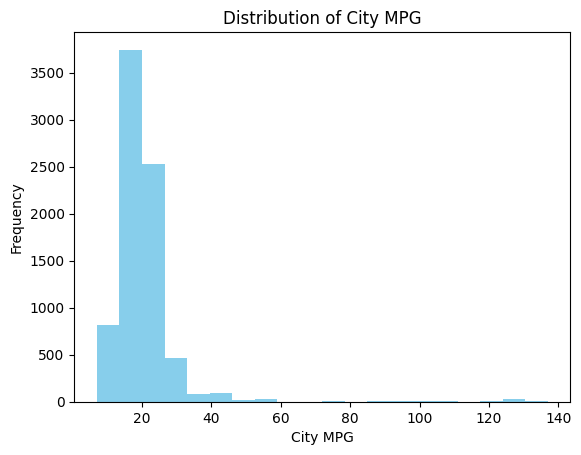

In [85]:
plt.hist(data['city mpg'], bins=20, color='skyblue')
plt.title('Distribution of City MPG')
plt.xlabel('City MPG')
plt.ylabel('Frequency')
plt.show()


##### ** Ein Balkendiagramm, das den Durchschnitt für jede Kategorie in "MSRP" "Fahrzeuggröße" zeigt


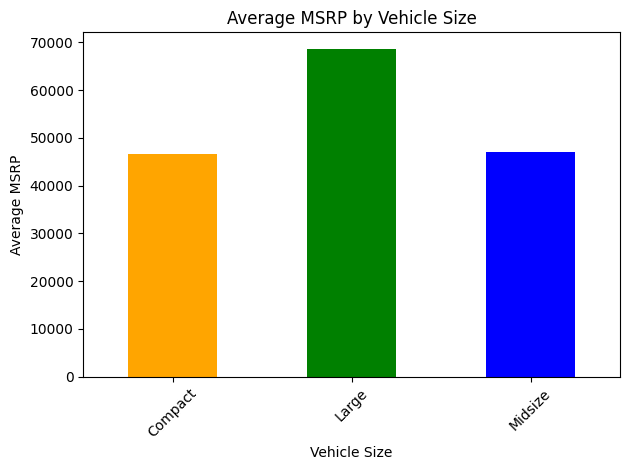

In [86]:
avg_price_by_size = data.groupby('Vehicle Size')['MSRP'].mean()
avg_price_by_size.plot(kind='bar', color=['orange', 'green', 'blue'])  # Farben nach Bedarf anpassen
plt.title('Average MSRP by Vehicle Size')
plt.xlabel('Vehicle Size')
plt.ylabel('Average MSRP')
plt.xticks(rotation=45)  # x-Achsenbeschriftungen zur besseren Lesbarkeit drehbar
plt.tight_layout()  # Das Layout kann angepasst werden, um zu verhindern, dass sich Beschriftungen überlappen
plt.show()


##### ** Ein Streudiagramm (Scatterplot), das die Beziehung zwischen „Motorleistung“ und MSPR zeigt


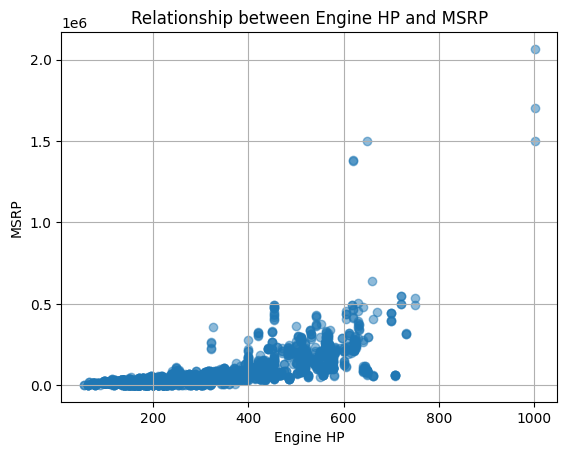

In [88]:
plt.scatter(data['Engine HP'], data['MSRP'], alpha=0.5)
plt.title('Relationship between Engine HP and MSRP')
plt.xlabel('Engine HP')
plt.ylabel('MSRP')
plt.grid(True)  # Add a grid for better readability (optional)
plt.show()


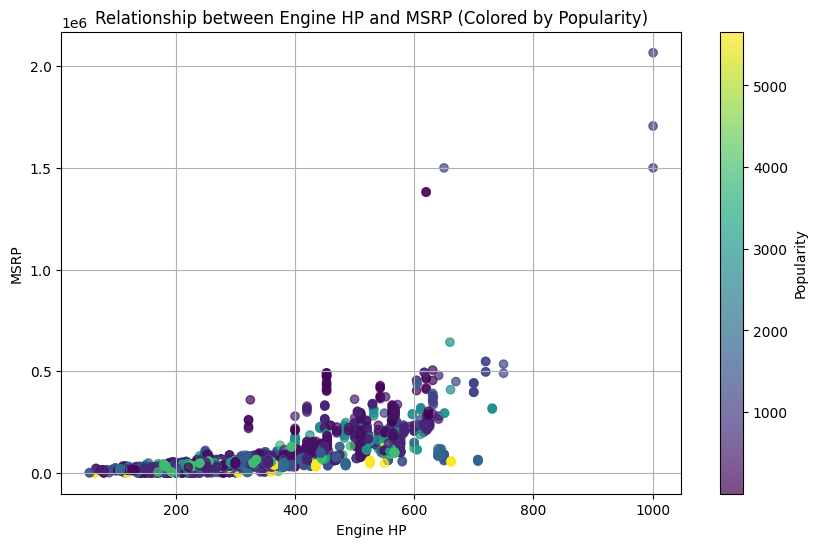

In [91]:
plt.figure(figsize=(10, 6))  # Größe der Abbildung bei Bedarf anpassen
plt.scatter(data['Engine HP'], data['MSRP'], c=data['Popularity'], cmap='viridis', alpha=0.7)
plt.title('Relationship between Engine HP and MSRP (Colored by Popularity)')
plt.xlabel('Engine HP')
plt.ylabel('MSRP')
plt.colorbar(label='Popularity')  # Einen Farbbalken hinzufügen, um die Farbskala anzuzeigen
plt.grid(True)
plt.show()

##### ** Ein Boxplot, der die Verteilung der einzelnen Kategorien "MSRP" und "Driven_Wheels" zeigt.

In [93]:
# Überprüfung der Typen
data['Driven_Wheels'].unique()

array(['rear wheel drive', 'all wheel drive', 'front wheel drive',
       'four wheel drive'], dtype=object)

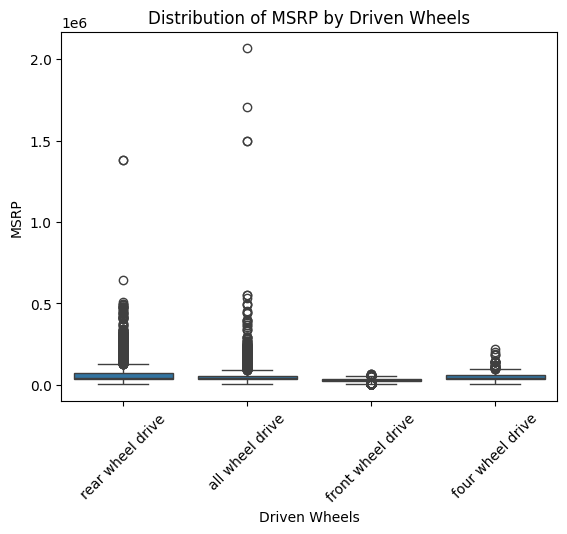

In [92]:
sns.boxplot(x='Driven_Wheels', y='MSRP', data=data)
plt.title('Distribution of MSRP by Driven Wheels')
plt.xlabel('Driven Wheels')
plt.ylabel('MSRP')
plt.xticks(rotation=45)
plt.show()


##### ** Ein Liniendiagramm, das Trends im Durchschnitt und für verschiedene „Stadt-MPG“, „Autobahn-MPG“ und „Getriebeart“ zeigt

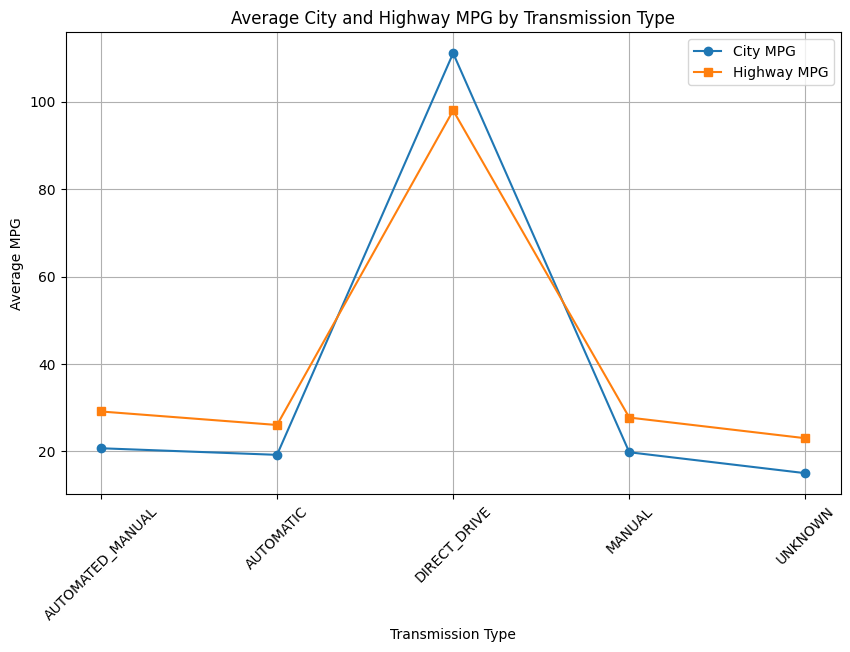

In [97]:
# Daten nach Übertragungsart gruppieren und durchschnittlichen Stadt- und Autobahnverbrauch berechnen
avg_mpg_by_transmission = data.groupby('Transmission Type')[['city mpg', 'highway MPG']].mean()

# Liniendiagramm erstellen
plt.figure(figsize=(10, 6))  # Größe der Abbildung bei Bedarf anpassen
plt.plot(avg_mpg_by_transmission.index, avg_mpg_by_transmission['city mpg'], label='City MPG', marker='o')
plt.plot(avg_mpg_by_transmission.index, avg_mpg_by_transmission['highway MPG'], label='Highway MPG', marker='s')
plt.title('Average City and Highway MPG by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Average MPG')
plt.xticks(rotation=45)  # Beschriftungen der x-Achse bei Bedarf zur besseren Lesbarkeit drehen
plt.legend()
plt.grid(True)
plt.show()

#### 4- Korrelationsanalyse:
#### Untersuchung der Korrelation zwischen den folgenden Variablen: „Motorleistung“, „Beliebtheit“, „Stadtverbrauch“ und „Autobahnverbrauch“

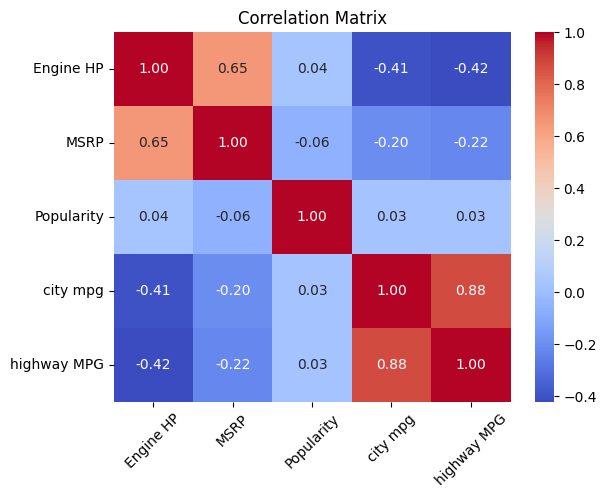

In [100]:
# Spalten für Korrelationsanalyse auswählen
columns_for_correlation = ['Engine HP', 'MSRP', 'Popularity', 'city mpg', 'highway MPG']

# Berechnung der Korrelationsmatrix
correlation_matrix = data[columns_for_correlation].corr()

# Darstellung der Korrelationsmatrix mithilfe einer Heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.xticks(rotation=45)
plt.show()

Die Analyse der Fahrzeugdaten zeigt signifikante Zusammenhänge zwischen den technischen Merkmalen und dem Marktwert der Fahrzeuge. Es besteht eine starke positive Korrelation (r = 0,65) zwischen der Motorleistung und dem Preis, wobei Fahrzeuge mit mehr als 600 PS häufig Preise von über 2 Millionen Dollar erzielen. Diese Leistung geht jedoch mit einem Kompromiss bei der Kraftstoffeffizienz einher, da leistungsstarke Motoren im Stadtverkehr und auf Autobahnen mehr Kraftstoff verbrauchen. Auch die Art des Getriebes spielt eine wichtige Rolle: Systeme mit Direktantrieb (wahrscheinlich Elektro-/Hybridantrieb) weisen die beste Energieeffizienz auf, während Automatikgetriebe im Vergleich zu Schaltgetrieben eine etwas geringere Effizienz aufweisen. Strukturelle Trends verdeutlichen die Auswirkungen der Technologieentscheidungen auf den Markt. Die Preise für große Fahrzeuge steigen aufgrund der Materialkosten und des wahrgenommenen Wertes, während die Komplexität der Getriebe sowohl den Preis als auch den Verbrauch beeinflusst. Diese Beobachtungen unterstreichen die Präferenz der Industrie für die Bruttoleistung trotz ihrer Umweltauswirkungen und zeigen die Kompromisse zwischen Komfort (Automatikgetriebe) und Energieeinsparung. Die Daten deuten darauf hin, dass Innovationen im Getriebebereich ein wichtiger Hebel sein könnten, um Leistung und Effizienz bei zukünftigen Fahrzeugkonzepten in Einklang zu bringen.

In [102]:
data.to_csv('cleaned_data.csv', index=False)
from google.colab import files
files.download('cleaned_data.csv')  # Herunterladen der aufbereiteten Datei.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>